In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
average_rent_df = pd.read_csv("Resources/Average Rents_Concat.csv").dropna()
average_rent_df = average_rent_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
average_rent_df.head()

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
0,Nfld.Lab.,St. John's,St. John's East,St. John's East,Row,0.0,783.0,943.0,0.0,1166.0,2018
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,664.0,829.0,1049.0,1002.0,941.0,2018
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,743.0,0.0,576.0,2018
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,762.0,773.0,881.0,959.0,839.0,2018
4,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Row,0.0,0.0,0.0,0.0,0.0,2018


In [4]:
average_rent_trend_df = average_rent_df[['Province','Year','Total']]

provinces_for_trend = ["Alta", "B.C.","Ont.","Que","Sask."]

average_rent_trend_df = average_rent_trend_df[(average_rent_trend_df['Province'].isin(provinces_for_trend))]

average_rent_trend_df = pd.pivot_table(average_rent_trend_df, index='Year', columns='Province', values='Total', aggfunc='mean', fill_value=0).reset_index()

average_rent_trend_df.columns = ["Year", "Alta", "B.C.", "Ont.","Que","Sask."]

average_rent_trend_df.head()

,Year,Alta,B.C.,Ont.,Que,Sask.
0,2018,710.186992,711.200000,625.719020,373.145729,573.959459
1,2019,726.524390,709.995238,655.959654,407.859296,564.000000
2,2020,722.577236,743.757143,667.935159,421.550251,545.608108
3,2021,723.711382,780.609524,667.131124,413.150754,573.148649
4,2022,752.804878,859.295238,702.646974,412.781407,636.418919


AttributeError: 'str' object has no attribute 'png'

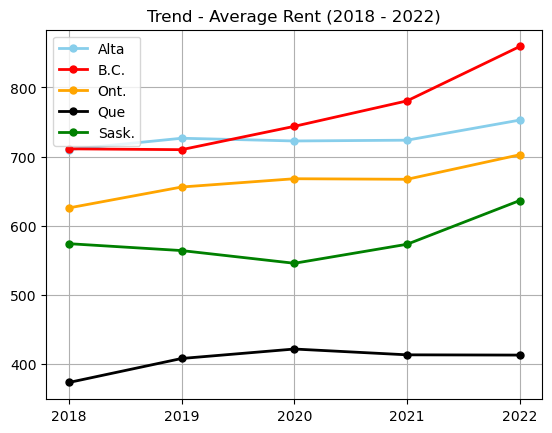

In [6]:
#plot Rent Trend:
plt.plot( 'Year', 'Alta', data=average_rent_trend_df, marker='o', markerfacecolor='skyblue', markersize=5, color='skyblue', linewidth=2)
plt.plot( 'Year', 'B.C.', data=average_rent_trend_df, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)

plt.plot( 'Year', 'Ont.', data=average_rent_trend_df, marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=2)
plt.plot( 'Year', 'Que', data=average_rent_trend_df, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=2)
plt.plot( 'Year', 'Sask.', data=average_rent_trend_df, marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=2)

plt.xticks([2018,2019,2020,2021,2022])

plt.title("Trend - Average Rent (2018 - 2022)")
plt.grid()
plt.legend()

plt.savefig("../output_data/Trend-Average_Rent.png")
plt.show()

In [18]:
average_rent_df_2022 = average_rent_df[(average_rent_df['Year']==2022)]

average_rent_summary_bachelor = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["Bachelor"]
average_rent_summary_one_bedroom = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["1 Bedroom"]
average_rent_summary_two_bedroom = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["2 Bedroom"]
average_rent_summary_three_bedroom_plus = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["3 Bedroom +"]
average_rent_summary_three_bedroom_total = average_rent_df_2022.groupby(["Province"]).mean(numeric_only=True)["Total"]  

average_rent_summary_2022 = pd.concat([average_rent_summary_bachelor, average_rent_summary_one_bedroom, average_rent_summary_two_bedroom,
                                   average_rent_summary_three_bedroom_plus, average_rent_summary_three_bedroom_total]
                                  , axis=1)

average_rent_summary_2022.columns = ["Bachelor", "1 Bedroom", "2 Bedroom", "3 Bedroom +","Total"]
average_rent_summary_2022

,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
Province,,,,,
Alta,176.321138,491.414634,686.955285,529.666667,752.804878
B.C.,415.457143,666.376190,898.490476,675.047619,859.295238
Man.,297.034483,508.706897,743.620690,750.068966,867.637931
N.B.,115.192308,315.250000,432.038462,261.576923,414.903846
N.S.,183.769231,454.884615,658.750000,555.269231,653.288462
Nfld.Lab.,261.500000,409.666667,634.333333,482.500000,782.500000
Ont.,260.368876,540.141210,681.353026,510.929395,702.646974
Que,147.065327,294.896985,410.635678,356.123116,412.781407
Sask.,246.054054,543.972973,616.108108,388.932432,636.418919


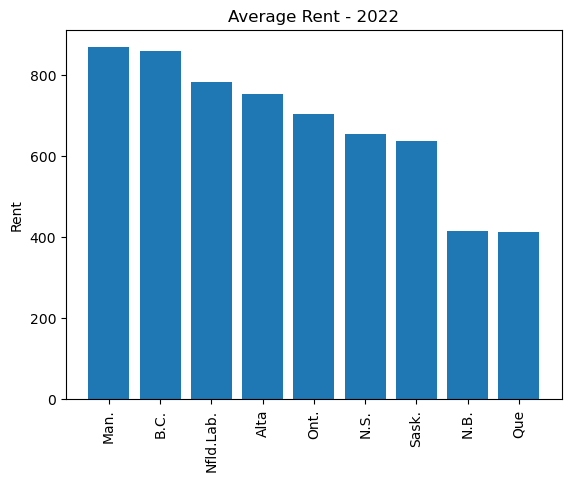

In [19]:
#plot Total:
average_rent_summary = average_rent_summary_2022.sort_values(by="Total", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['Total']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent - 2022")

plt.show()

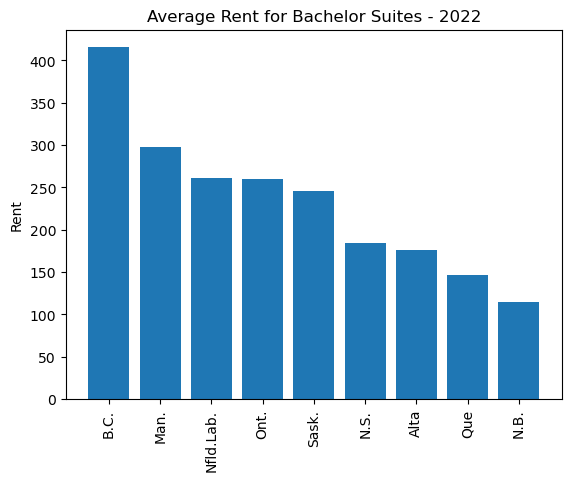

In [20]:
#plot 1:
average_rent_summary = average_rent_summary_2022.sort_values(by="Bachelor", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['Bachelor']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent for Bachelor Suites - 2022")

plt.show()

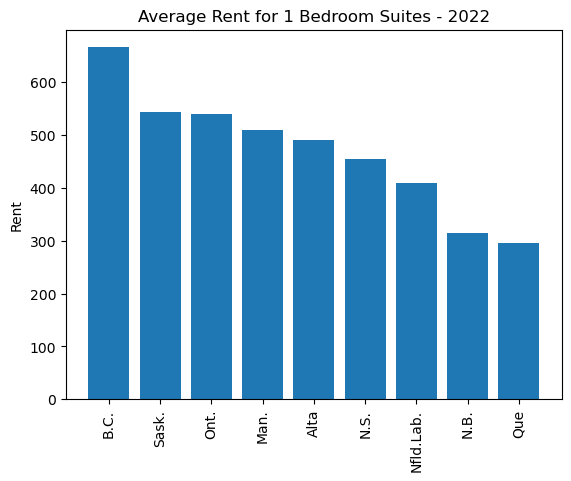

In [21]:
#plot 2:
average_rent_summary = average_rent_summary_2022.sort_values(by="1 Bedroom", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['1 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent for 1 Bedroom Suites - 2022")

plt.show()

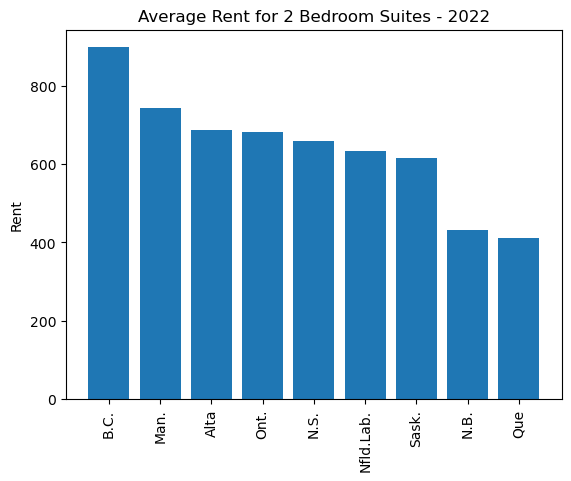

In [22]:
#plot 3:
average_rent_summary = average_rent_summary_2022.sort_values(by="2 Bedroom", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['2 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent for 2 Bedroom Suites - 2022")

plt.show()

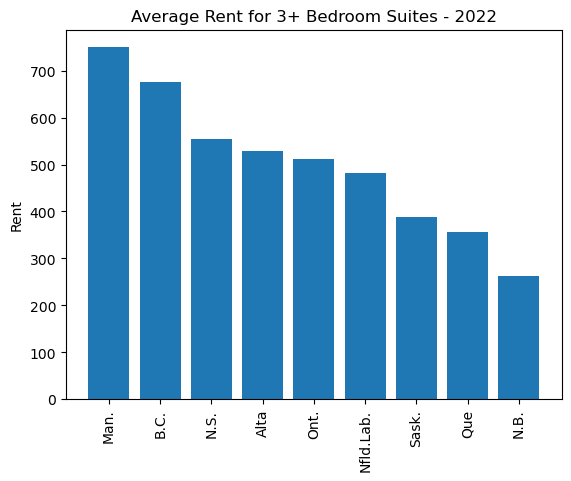

In [23]:
#plot 4:
average_rent_summary = average_rent_summary_2022.sort_values(by="3 Bedroom +", ascending=False)
x = average_rent_summary.index
y = average_rent_summary['3 Bedroom +']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Rent for 3+ Bedroom Suites - 2022")

plt.show()